In [34]:
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

from IPython.display import display, Image

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # creating instance of StandardScaler



from sklearn.model_selection import train_test_split

from keras.models import Sequential

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

In [35]:
data = pd.read_csv('diabetes.csv')

In [36]:
data.shape

(768, 9)

In [37]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### handling outlayers 

In [41]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
IQR

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64

In [43]:
# this mean that any thing less then mini and greater then max print it 
((data < (Q1 - 1.5 * IQR))  | (data > (Q3 + 1.5 * IQR))).sum()

Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

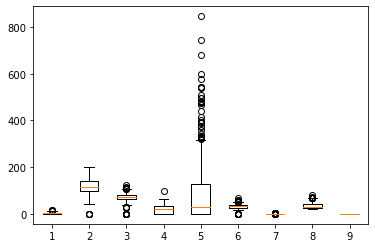

In [44]:
display(Image(filename='data with outlayers.png'))

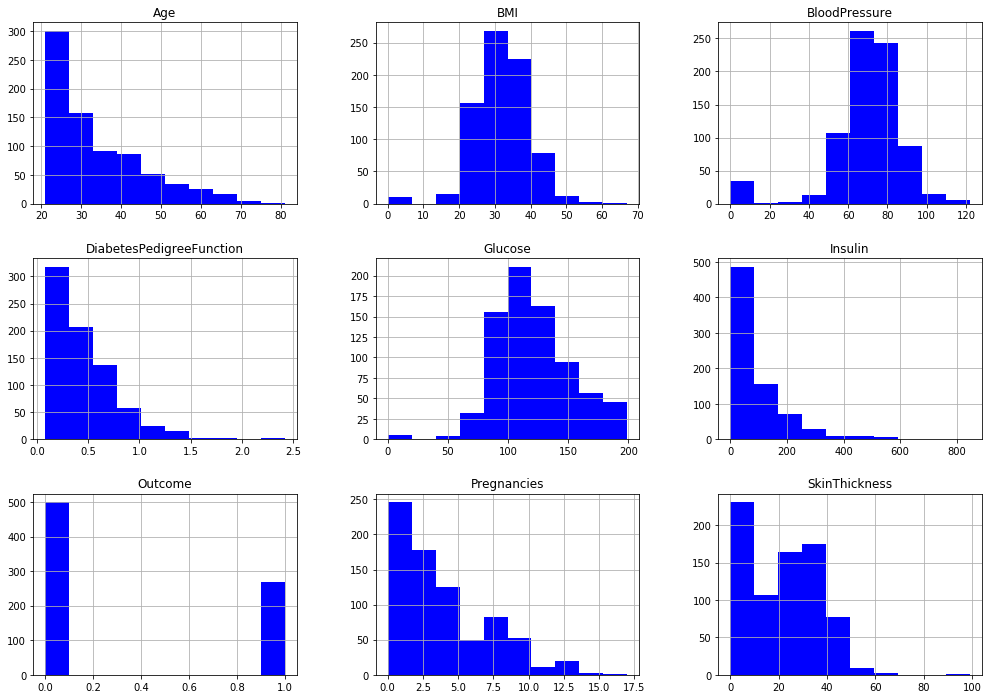

In [45]:
data.hist(figsize=(17,12),color='blue') 
plt.show()

In [46]:
names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin'
         ,'BMI','DiabetesPedigreeFunction','Age','Outcome']

In [47]:
for x in names:
    #plt.boxplot(data[x])
    #plt.show() 
    
    a = data[x].quantile(0.10)
    b = data[x].quantile(0.90)
    
    #print(data.skew())
    Q1=data[x].quantile(0.25)
    Q3=data[x].quantile(0.75)
    IQR=Q3-Q1
    Min= Q1 - 1.5 * IQR
    Max= Q3 + 1.5 * IQR
    
    data[x] = np.where(data[x] <Min, a,data[x])
    data[x] = np.where(data[x] >Max, b,data[x])

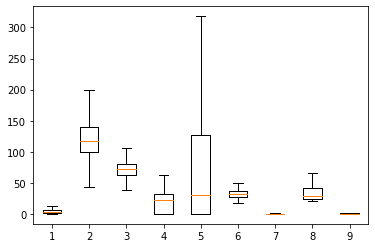

In [48]:
display(Image(filename='data after handling out layers.png'))

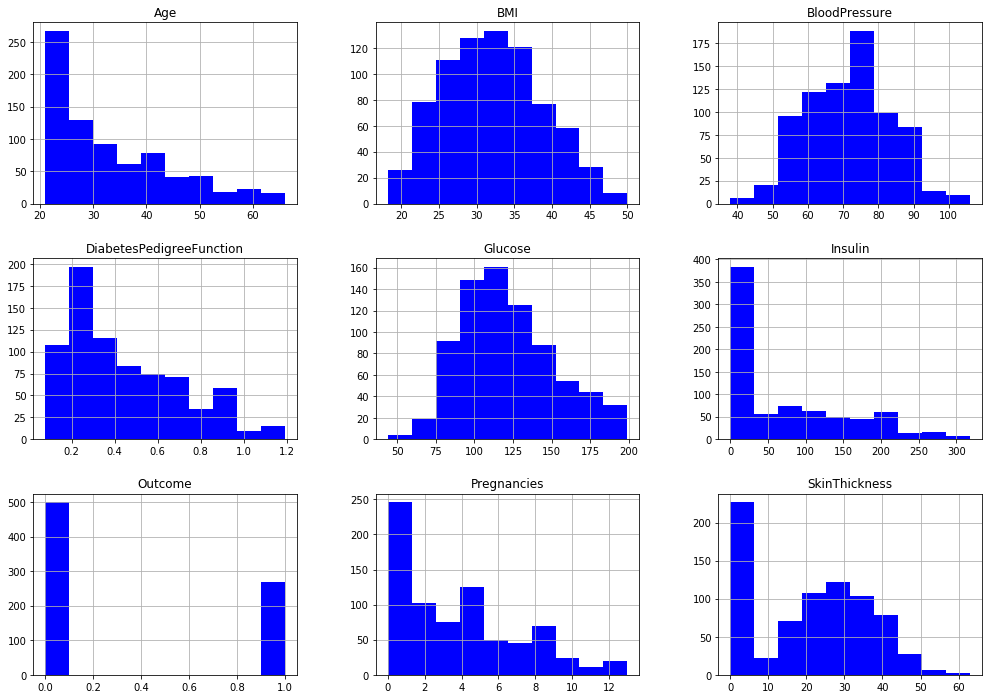

In [49]:
data.hist(figsize=(17,12),color='blue') 
plt.show()

In [50]:
y = data['Outcome']
X = data.iloc[:,:-1]

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.15)

print(X_train.shape)
print(X_test.shape)

(652, 8)
(116, 8)


In [52]:
# scaling

scaler = StandardScaler()

scaler_X_train=scaler.fit_transform(X_train)
scaler_X_train

array([[-0.55310058, -0.43251507, -0.79719096, ..., -1.05437096,
         1.71254112, -0.98790909],
       [-0.85437174,  2.37822425, -1.81120854, ..., -0.96325967,
         0.83164711, -0.81206505],
       [-0.85437174, -0.3333125 ,  1.23084419, ..., -0.32548064,
        -1.16400657, -0.89998707],
       ...,
       [ 0.04944174, -0.89546037, -0.54368657, ..., -1.14548225,
        -1.14451777, -1.07583112],
       [ 2.15833985, -1.19306806,  0.21682661, ..., -0.32548064,
        -0.55205808,  0.15507719],
       [ 0.3507129 ,  0.49337553,  0.89283833, ..., -1.31251961,
         0.7731807 ,  1.56182953]])

In [53]:
scaler_X_test=scaler.transform(X_test)
scaler_X_test

array([[-0.85437174,  2.57662938,  0.38582954,  1.43700027, -0.83589362,
         1.61822687,  1.7031865 , -0.98790909],
       [-0.55310058, -0.46558259,  0.21682661,  0.60825874,  0.36941111,
         0.20600188, -0.14669092, -0.89998707],
       [ 0.04944174, -1.49067575, -0.79719096, -1.30422172, -0.83589362,
         0.26674274, -0.19736182, -0.72414303],
       [ 0.3507129 ,  1.48540118,  0.04782368, -0.0929841 ,  1.27338966,
        -0.97844488,  0.56659936,  1.56182953],
       [-1.1556429 , -0.3333125 , -0.54368657, -1.30422172, -0.83589362,
        -1.16066746,  0.85113592, -0.1966109 ],
       [-0.85437174, -1.32533814,  0.04782368, -0.15673344, -0.35377173,
        -0.85696316, -0.61832002, -0.81206505],
       [ 1.55579753,  1.02245588,  0.55483247,  0.86325613,  1.22517747,
         0.29711317,  1.75931426, -0.02076686],
       [-0.25182942,  1.81607639,  1.23084419,  0.41701069,  1.04438176,
         0.16044624,  2.7766299 ,  1.64975155],
       [-0.55310058,  0.19576784

In [54]:
# traing --- SVM modle 

svc_clf = SVC(C=.1, kernel='sigmoid', degree=3 , gamma='auto')

svc_clf.fit(scaler_X_train,y_train)

svc_clf_predictions = svc_clf.predict(scaler_X_test)

In [55]:
c=confusion_matrix(y_test,svc_clf_predictions)
a=accuracy_score(y_test,svc_clf_predictions)
p=precision_score(y_test,svc_clf_predictions)
r=recall_score(y_test,svc_clf_predictions) 

In [56]:
print('Confusion Matrix:\n',c)
print('Accuracy:',a*100)
print('Precision:',p*100)
print('Recall:',r*100)

Confusion Matrix:
 [[70  8]
 [14 24]]
Accuracy: 81.03448275862068
Precision: 75.0
Recall: 63.1578947368421
